# ASSIGNMENT2

# Taking PlayerTeamCombined Dataset created using API in Assignment1:

In [263]:
##Importing Libraries required for performing operations:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [264]:
##Read the CSV file:

PlayerTeam_DF = pd.read_csv("PlayerTeamCombined.csv")
PlayerTeam_DF

,Unnamed: 0,id,playerId,firstName,lastName,teamId,city,conference,division,full_name,name
0,0,12.0,14.0,Ike,Anigbogu,12.0,Indiana,East,Central,Indiana Pacers,Pacers
1,1,12.0,679.0,Sean,Green,12.0,Indiana,East,Central,Indiana Pacers,Pacers
2,2,12.0,700.0,Dale,Davis,12.0,Indiana,East,Central,Indiana Pacers,Pacers
3,3,12.0,756.0,Malik,Sealy,12.0,Indiana,East,Central,Indiana Pacers,Pacers
4,4,12.0,833.0,Antonio,Davis,12.0,Indiana,East,Central,Indiana Pacers,Pacers
...,...,...,...,...,...,...,...,...,...,...,...
395,395,5.0,782.0,Jojo,English,5.0,Chicago,East,Central,Chicago Bulls,Bulls
396,396,5.0,789.0,Joe,Courtney,5.0,Chicago,East,Central,Chicago Bulls,Bulls
397,397,5.0,792.0,Ricky,Blanton,5.0,Chicago,East,Central,Chicago Bulls,Bulls
398,398,5.0,815.0,Corie,Blount,5.0,Chicago,East,Central,Chicago Bulls,Bulls


In [265]:
##Check for null values :
PlayerTeam_DF.isnull().any()

Unnamed: 0    False
id            False
playerId      False
firstName     False
lastName      False
teamId        False
city          False
conference    False
division      False
full_name     False
name          False
dtype: bool

##Observation:

We have two potential primary keys in the above table, i.e we have composite primary keys:
playerid and teamid.
The column value id and teamid are redundant
There is partial dependency in the dataset.
Hence we need to normalize the dataset:

# Normalization :

Database normalization is the process of organizing the attributes and tables of a relational database to
minimize data redundancy.

Normalization involves refactoring a table into smaller (and less redundant) tables but without losing
information; defining foreign keys in the old table referencing the primary keys of the new ones. The
objective is to isolate data so that additions, deletions, and modifications of an attribute can be made in
just one table and then propagated through the rest of the database using the defined foreign keys.

We will convert our dataset into Normalize format,
We will use 3 normal forms namely:

1.First normal form (1NF)
• Each table has a primary key: minimal set of attributes which can uniquely identify a
record
• The values in each column of a table are atomic (No multi-value attributes allowed).
• There are no repeating groups: two columns do not store similar information in the
same table.

2.Second normal form (2NF)
• All requirements for 1st NF must be met.
• No partial dependencies.
• No calculated data

3.Third normal form (3NF)
• All requirements for 2nd NF must be met.
• Eliminate fields that do not directly depend on the primary key; that is no transitive
dependencies.

# 1NF :

In [266]:
##To convert our dataset into 1NF we need to remove id which is similar to teamid column
PlayerTeam_DF = PlayerTeam_DF.drop(columns=['id'])

In [267]:
PlayerTeam_DF

,Unnamed: 0,playerId,firstName,lastName,teamId,city,conference,division,full_name,name
0,0,14.0,Ike,Anigbogu,12.0,Indiana,East,Central,Indiana Pacers,Pacers
1,1,679.0,Sean,Green,12.0,Indiana,East,Central,Indiana Pacers,Pacers
2,2,700.0,Dale,Davis,12.0,Indiana,East,Central,Indiana Pacers,Pacers
3,3,756.0,Malik,Sealy,12.0,Indiana,East,Central,Indiana Pacers,Pacers
4,4,833.0,Antonio,Davis,12.0,Indiana,East,Central,Indiana Pacers,Pacers
...,...,...,...,...,...,...,...,...,...,...
395,395,782.0,Jojo,English,5.0,Chicago,East,Central,Chicago Bulls,Bulls
396,396,789.0,Joe,Courtney,5.0,Chicago,East,Central,Chicago Bulls,Bulls
397,397,792.0,Ricky,Blanton,5.0,Chicago,East,Central,Chicago Bulls,Bulls
398,398,815.0,Corie,Blount,5.0,Chicago,East,Central,Chicago Bulls,Bulls


##Observations from the output:
1. There is no redundancy in columns (no two or more columns contains similar data)
2. The values are atomic no multi valued attribute us present and have minimal set of attribute to uniquely identify the records

Hence, We can say that the table is in First Normal Form (1NF)

We also observe that the table contains partial dependency:
-- PlayerNames ie: firstName and lastName depends only on playerId and not on columns related to teams
-- teamName,full_name,name,city,conference and division depends only on teamid and it is redundant
To remove this partial dependency we need to convert our dataset into 2NF:

# 2NF :

1.We divide the table into two as :
    a. PlayerData
    b. TeamData
2. We introduce primary key and foreign key in the newly created datasets
3. We check for partial dependencies and calculated fields in the newly created datasets:

In [268]:
PlayerData = pd.DataFrame(columns=['playerId', 'firstName','lastName','teamId'], data=PlayerTeam_DF[['playerId','firstName','lastName','teamId']].values)

In [269]:
PlayerData

,playerId,firstName,lastName,teamId
0,14,Ike,Anigbogu,12
1,679,Sean,Green,12
2,700,Dale,Davis,12
3,756,Malik,Sealy,12
4,833,Antonio,Davis,12
...,...,...,...,...
395,782,Jojo,English,5
396,789,Joe,Courtney,5
397,792,Ricky,Blanton,5
398,815,Corie,Blount,5


In [270]:
##Check for null values :
PlayerData.isnull().any()

playerId     False
firstName    False
lastName     False
teamId       False
dtype: bool

In [271]:
##Check for unique constraint on playerId:
PlayerData['playerId'].is_unique

True

In [272]:
##Creating a CSV for the dataset :
PlayerData.to_csv(r'C:\Users\Ankita\Desktop\DMDD\DMDD_Assignment2\PlayerData.csv')

In [273]:
##Repeating the same process to create TeamData Dataset:
TeamData = pd.DataFrame(columns=['teamId','conference','division','full_name','name'], data=PlayerTeam_DF[['teamId','conference','division','full_name','name']].values)

In [274]:
TeamData

,teamId,conference,division,full_name,name
0,12,East,Central,Indiana Pacers,Pacers
1,12,East,Central,Indiana Pacers,Pacers
2,12,East,Central,Indiana Pacers,Pacers
3,12,East,Central,Indiana Pacers,Pacers
4,12,East,Central,Indiana Pacers,Pacers
...,...,...,...,...,...
395,5,East,Central,Chicago Bulls,Bulls
396,5,East,Central,Chicago Bulls,Bulls
397,5,East,Central,Chicago Bulls,Bulls
398,5,East,Central,Chicago Bulls,Bulls


In [275]:
##Check for NullValues :
TeamData.isnull().any()

teamId        False
conference    False
division      False
full_name     False
name          False
dtype: bool

In [276]:
##Check for unique constraint on playerId:
TeamData['teamId'].is_unique

False

In [277]:
##Drop the duplicate values:
TeamData.sort_values(by="teamId")

,teamId,conference,division,full_name,name
199,1,East,Southeast,Atlanta Hawks,Hawks
213,1,East,Southeast,Atlanta Hawks,Hawks
214,1,East,Southeast,Atlanta Hawks,Hawks
200,1,East,Southeast,Atlanta Hawks,Hawks
215,1,East,Southeast,Atlanta Hawks,Hawks
...,...,...,...,...,...
339,30,East,Southeast,Washington Wizards,Wizards
338,30,East,Southeast,Washington Wizards,Wizards
337,30,East,Southeast,Washington Wizards,Wizards
345,30,East,Southeast,Washington Wizards,Wizards


In [278]:
##Drop duplicates:
TeamData.drop_duplicates(subset='teamId',keep='first',inplace=True)

In [279]:
TeamData.shape

(29, 5)

In [280]:
TeamData['teamId'].is_unique

True

In [281]:
TeamData = TeamData.sort_values(by="teamId")

In [282]:
##Adding conferenceId which will be used while we Normalize it Further:
TeamData['conferenceId'] = TeamData.apply(lambda row: row.conference =='East', axis = 1).astype(int)

In [283]:
TeamData

,teamId,conference,division,full_name,name,conferenceId
199,1,East,Southeast,Atlanta Hawks,Hawks,1
12,2,East,Atlantic,Boston Celtics,Celtics,1
357,3,East,Atlantic,Brooklyn Nets,Nets,1
364,4,East,Southeast,Charlotte Hornets,Hornets,1
392,5,East,Central,Chicago Bulls,Bulls,1
151,6,East,Central,Cleveland Cavaliers,Cavaliers,1
273,7,West,Southwest,Dallas Mavericks,Mavericks,0
296,8,West,Northwest,Denver Nuggets,Nuggets,0
32,9,East,Central,Detroit Pistons,Pistons,1
65,10,West,Pacific,Golden State Warriors,Warriors,0


In [284]:
TeamData["conferenceId"].replace({0:2}, inplace=True)


In [285]:
TeamData

,teamId,conference,division,full_name,name,conferenceId
199,1,East,Southeast,Atlanta Hawks,Hawks,1
12,2,East,Atlantic,Boston Celtics,Celtics,1
357,3,East,Atlantic,Brooklyn Nets,Nets,1
364,4,East,Southeast,Charlotte Hornets,Hornets,1
392,5,East,Central,Chicago Bulls,Bulls,1
151,6,East,Central,Cleveland Cavaliers,Cavaliers,1
273,7,West,Southwest,Dallas Mavericks,Mavericks,2
296,8,West,Northwest,Denver Nuggets,Nuggets,2
32,9,East,Central,Detroit Pistons,Pistons,1
65,10,West,Pacific,Golden State Warriors,Warriors,2


In [286]:
##Now if we observe the data we have full_name and name:
##when we have full_name we find it redundant to use the name again in another column,
##Hence we drop the column name.
TeamData=TeamData.drop(['name'],axis =1)

In [287]:
TeamData

,teamId,conference,division,full_name,conferenceId
199,1,East,Southeast,Atlanta Hawks,1
12,2,East,Atlantic,Boston Celtics,1
357,3,East,Atlantic,Brooklyn Nets,1
364,4,East,Southeast,Charlotte Hornets,1
392,5,East,Central,Chicago Bulls,1
151,6,East,Central,Cleveland Cavaliers,1
273,7,West,Southwest,Dallas Mavericks,2
296,8,West,Northwest,Denver Nuggets,2
32,9,East,Central,Detroit Pistons,1
65,10,West,Pacific,Golden State Warriors,2


In [288]:
##Creating a CSV for the dataset :
TeamData.to_csv(r'C:\Users\Ankita\Desktop\DMDD\DMDD_Assignment2\TeamData.csv')

##Observtion:
1.Our data is in 1NF 
2.Eliminated redundancy and partial dependency
3.There is no calculated Data present in the tables

Hence, our datasets are now in 2NF form

# 3NF :

# Observation:
1. The data is in 2NF
2. There is transitive dependency in TeamData on division and conferences,that is if division changes the conferences will have to change.

Therefore,We need to convert our data into 3NF form:

In [289]:
##Creating a DataFrame for conference : 

ConferenceData = pd.DataFrame(columns=['conference_name','division','conferenceId'], data=TeamData[['conference','division','conferenceId']].values)

In [290]:
ConferenceData.sort_values(by="conference_name")

,conference_name,division,conferenceId
0,East,Southeast,1
26,East,Atlantic,1
21,East,Atlantic,1
20,East,Southeast,1
18,East,Atlantic,1
16,East,Central,1
15,East,Southeast,1
11,East,Central,1
28,East,Southeast,1
4,East,Central,1


In [291]:
##As we can see in the above table that we need to separate division and conference_name and add primary key and foreign key to the ConferenceTable:

ConferenceData1 ={'conference_name': ['East','West'], 'confId': [1,2]}
ConferenceData1 = pd.DataFrame(data=ConferenceData1)

In [292]:
ConferenceData1

,conference_name,confId
0,East,1
1,West,2


In [293]:
##Adding confid as Foreign key in TeamData :
##TeamData = pd.merge(ConferenceData1,TeamData,left_on='confId',right_on='teamId')                            
##TeamData


In [294]:
##Creating Division dataset and adding confId as our foreign key:
##DivisionData ={'division_Name': ['East','West'], 'confId': [1,2]}
##ConferenceData1 = pd.DataFrame(data=ConferenceData1)

In [295]:
DivisionData = pd.DataFrame(columns=['divisionName','conferenceId'], data=ConferenceData[['division','conferenceId']].values)
DivisionData

,divisionName,conferenceId
0,Southeast,1
1,Atlantic,1
2,Atlantic,1
3,Southeast,1
4,Central,1
5,Central,1
6,Southwest,2
7,Northwest,2
8,Central,1
9,Pacific,2


In [296]:
DivisionData.sort_values(by="divisionName")

,divisionName,conferenceId
21,Atlantic,1
1,Atlantic,1
2,Atlantic,1
26,Atlantic,1
18,Atlantic,1
4,Central,1
5,Central,1
8,Central,1
16,Central,1
11,Central,1


In [297]:
DivisionData.drop_duplicates(subset='divisionName',keep='first',inplace=True)

In [298]:
DivisionData

,divisionName,conferenceId
0,Southeast,1
1,Atlantic,1
4,Central,1
6,Southwest,2
7,Northwest,2
9,Pacific,2


In [299]:
divisionId = [1,2,3,4,5,6]
DivisionData['divisionId'] = divisionId

In [300]:
DivisionData

,divisionName,conferenceId,divisionId
0,Southeast,1,1
1,Atlantic,1,2
4,Central,1,3
6,Southwest,2,4
7,Northwest,2,5
9,Pacific,2,6


In [301]:
TeamData

,teamId,conference,division,full_name,conferenceId
199,1,East,Southeast,Atlanta Hawks,1
12,2,East,Atlantic,Boston Celtics,1
357,3,East,Atlantic,Brooklyn Nets,1
364,4,East,Southeast,Charlotte Hornets,1
392,5,East,Central,Chicago Bulls,1
151,6,East,Central,Cleveland Cavaliers,1
273,7,West,Southwest,Dallas Mavericks,2
296,8,West,Northwest,Denver Nuggets,2
32,9,East,Central,Detroit Pistons,1
65,10,West,Pacific,Golden State Warriors,2


Final Tables after Normalization :

In [302]:
TeamData.drop(columns=['conference', 'division'])

,teamId,full_name,conferenceId
199,1,Atlanta Hawks,1
12,2,Boston Celtics,1
357,3,Brooklyn Nets,1
364,4,Charlotte Hornets,1
392,5,Chicago Bulls,1
151,6,Cleveland Cavaliers,1
273,7,Dallas Mavericks,2
296,8,Denver Nuggets,2
32,9,Detroit Pistons,1
65,10,Golden State Warriors,2


In [337]:
ConferenceData1

,conference_name,confId
0,East,1
1,West,2


In [338]:
##Creating a CSV for the dataset :
ConferenceData1.to_csv(r'C:\Users\Ankita\Desktop\DMDD\DMDD_Assignment2\ConferenceData.csv')

In [304]:
DivisionData

,divisionName,conferenceId,divisionId
0,Southeast,1,1
1,Atlantic,1,2
4,Central,1,3
6,Southwest,2,4
7,Northwest,2,5
9,Pacific,2,6


In [339]:
##Creating a CSV for the dataset :
DivisionData.to_csv(r'C:\Users\Ankita\Desktop\DMDD\DMDD_Assignment2\DivisionData.csv')

In [305]:
PlayerData

,playerId,firstName,lastName,teamId
0,14,Ike,Anigbogu,12
1,679,Sean,Green,12
2,700,Dale,Davis,12
3,756,Malik,Sealy,12
4,833,Antonio,Davis,12
...,...,...,...,...
395,782,Jojo,English,5
396,789,Joe,Courtney,5
397,792,Ricky,Blanton,5
398,815,Corie,Blount,5


##Observation:
1. We Normalized the TeamData to 3NF by removing the dependency and creating two Dataset : DivisionData and ConferenceData1.
2. PlayerData was already in Normalized Form

Hence, Our Tables are in normalized from 1NF to 2NF to 3NF

# Taking Game Dataset created using API in Assignment1:

In [306]:
##Reading Game Dataset:
Game_DF = pd.read_csv("Game.csv")
Game_DF

,Unnamed: 0,gameId,date,home_team_score,visitor_team_score,homeTeamId,visitorTeamId
0,0,47179,2019-01-30T00:00:00.000Z,126,94,2,4
1,1,48751,2019-02-09T00:00:00.000Z,112,123,2,13
2,2,48739,2019-02-08T00:00:00.000Z,117,110,23,8
3,3,48740,2019-02-08T00:00:00.000Z,119,106,30,6
4,4,48746,2019-02-08T00:00:00.000Z,102,96,26,16
...,...,...,...,...,...,...,...
395,495,33,2018-10-20T00:00:00.000Z,119,91,8,24
396,496,34,2018-10-20T00:00:00.000Z,121,108,25,27
397,497,35,2018-10-20T00:00:00.000Z,115,124,14,11
398,498,36,2018-10-21T00:00:00.000Z,111,133,6,1


In [307]:
Game_DF.sort_values(by="gameId")

,Unnamed: 0,gameId,date,home_team_score,visitor_team_score,homeTeamId,visitorTeamId
363,463,1,2018-10-16T00:00:00.000Z,105,87,2,23
364,464,2,2018-10-16T00:00:00.000Z,108,100,10,21
365,465,3,2018-10-17T00:00:00.000Z,112,113,4,17
366,466,4,2018-10-17T00:00:00.000Z,103,100,9,3
367,467,5,2018-10-17T00:00:00.000Z,111,83,12,15
...,...,...,...,...,...,...,...
274,374,49147,2019-04-10T00:00:00.000Z,125,109,23,5
360,460,49149,2019-04-10T00:00:00.000Z,116,127,17,21
184,284,49150,2019-04-10T00:00:00.000Z,105,94,27,7
361,461,49151,2019-04-10T00:00:00.000Z,99,95,8,18


In [308]:
Game_DF['gameId'].is_unique

True

In [309]:
Game_DF.isnull().any()

Unnamed: 0            False
gameId                False
date                  False
home_team_score       False
visitor_team_score    False
homeTeamId            False
visitorTeamId         False
dtype: bool

# Normalization Of Game Table:

# Observations :

# 1NF :

For a table to be in 1NF we need to satisfy following requirements:

    1.There is no redundancy in columns (no two or more columns contains similar data)
    2.The values are atomic no multi valued attribute us present and have minimal set of attribute to uniquely identify the records(gameId)
    
Our Table satisfies both the requirements: no redundant columns are present and the values are atomic and have gameId as primary key to uniquely identify each row.
    
    

# 2NF :

For a Table to be in 2NF form we need to satisfy following requirements :
    1. It should be in 1NF 
    2.No partial dependencies
    3. No Calculated Data
We observe the our table satisfies all the requirements for it to be in 2NF,the table is in 1NF form,there is only one primary kwy and all the other values are dependented on primary key directly so there is no partial dependencies of any column on any other non primary column and there is no calculated data is present in the table
Hence our Table is in 2NF form

# 3NF :

For a Table to be in 3NF form it should satisfy the following requirements :

    1.All requirements for 2nd NF must be met.
    2. Eliminate fields that do not directly depend on the primary key; that is no transitive dependencies

We observe that our table satisfies all the requirements to be in 3NF:
    It is in in 2NF and there is no transitive dependency we have gameid as our primary key and hometeamid and awayteamid as foreign keys.

From this we conclude that our Table Game_DF is normalized.

In [310]:
Game_DF

,Unnamed: 0,gameId,date,home_team_score,visitor_team_score,homeTeamId,visitorTeamId
0,0,47179,2019-01-30T00:00:00.000Z,126,94,2,4
1,1,48751,2019-02-09T00:00:00.000Z,112,123,2,13
2,2,48739,2019-02-08T00:00:00.000Z,117,110,23,8
3,3,48740,2019-02-08T00:00:00.000Z,119,106,30,6
4,4,48746,2019-02-08T00:00:00.000Z,102,96,26,16
...,...,...,...,...,...,...,...
395,495,33,2018-10-20T00:00:00.000Z,119,91,8,24
396,496,34,2018-10-20T00:00:00.000Z,121,108,25,27
397,497,35,2018-10-20T00:00:00.000Z,115,124,14,11
398,498,36,2018-10-21T00:00:00.000Z,111,133,6,1


# Taking Stats Dataset created using API in Assignment1:

In [311]:
##Reading the Stats Table :
Stats_DF = pd.read_csv("Stats.csv")
Stats_DF

,Unnamed: 0,statId,playerId,points
0,0,1069008,415,7.0
1,1,1069009,49,2.0
2,2,1069010,91,8.0
3,3,1069011,210,24.0
4,4,1069012,161,10.0
...,...,...,...,...
395,495,1069397,406,16.0
396,496,1069398,150,19.0
397,497,12781,218,NaN
398,498,1069399,305,9.0


In [312]:
##Sortng and Checking for Duplicates in the table:
Stats_DF.sort_values(by="statId")

,Unnamed: 0,statId,playerId,points
51,51,11,78,NaN
174,274,141,144,NaN
175,275,142,203,NaN
323,423,325,134,NaN
385,485,403,26,NaN
...,...,...,...,...
394,494,1069396,103,16.0
395,495,1069397,406,16.0
396,496,1069398,150,19.0
398,498,1069399,305,9.0


In [313]:
Stats_DF['statId'].is_unique

True

In [314]:
##Checking for Null values :
Stats_DF.isnull().any()

Unnamed: 0    False
statId        False
playerId      False
points         True
dtype: bool

In [315]:
##Replacing null values with 0:
Stats_DF = Stats_DF.fillna(0)

In [316]:
##Checking for Null values :
Stats_DF.isnull().any()

Unnamed: 0    False
statId        False
playerId      False
points        False
dtype: bool

# Normalization Of Stats Table:

# Observations:

# 1NF:

For a table to be in 1NF we need to satisfy following requirements:

    1.There is no redundancy in columns (no two or more columns contains similar data)
    2.The values are atomic no multi valued attribute are present and have minimal set of attribute to uniquely identify the records(statId)
    
Our Table satisfies both the requirements: no redundant columns are present and the values are atomic and have gameId as primary key to uniquely identify each row.Hence it is in 1NF

# 2NF:

For a Table to be in 2NF form we need to satisfy following requirements :
    1. It should be in 1NF 
    2.No partial dependencies
    3. No Calculated Data
We observe the our table satisfies all the requirements for it to be in 2NF,the table is in 1NF form,there is only one primary key and all the other values are dependented on primary key directly so there is no partial dependencies of any column on any other non primary column and there is no calculated data is present in the table
Hence our Table is in 2NF form

# 3NF:

 For a Table to be in 3NF form it should satisfy the following requirements :

    1.All requirements for 2nd NF must be met.
    2. Eliminate fields that do not directly depend on the primary key; that is no transitive dependencies

We observe that our table satisfies all the requirements to be in 3NF:
    It is in in 2NF and there is no transitive dependency we have statid as our primary key and playerid as foreign keys.

Hence our Table Stats_DF is in Normalized form

In [317]:
Stats_DF

,Unnamed: 0,statId,playerId,points
0,0,1069008,415,7.0
1,1,1069009,49,2.0
2,2,1069010,91,8.0
3,3,1069011,210,24.0
4,4,1069012,161,10.0
...,...,...,...,...
395,495,1069397,406,16.0
396,496,1069398,150,19.0
397,497,12781,218,0.0
398,498,1069399,305,9.0


# Conceptual Model:

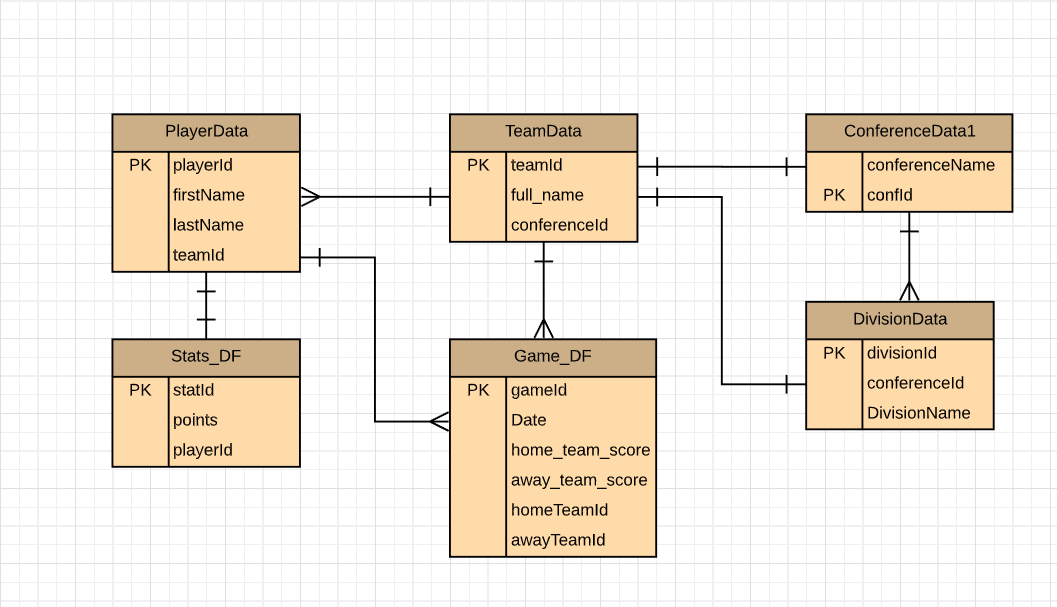

In [318]:
from IPython.display import Image
Image("ConceptualModel.png")

# Physical Model:

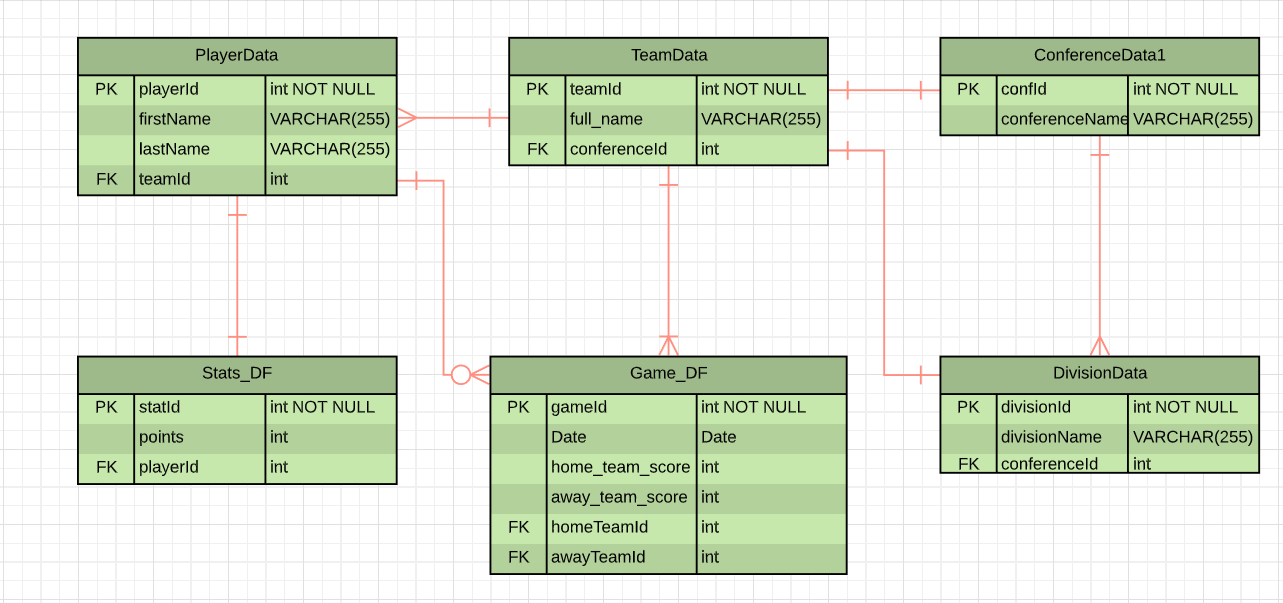

In [319]:
Image("PhysicalModel.png")

# UML Model:

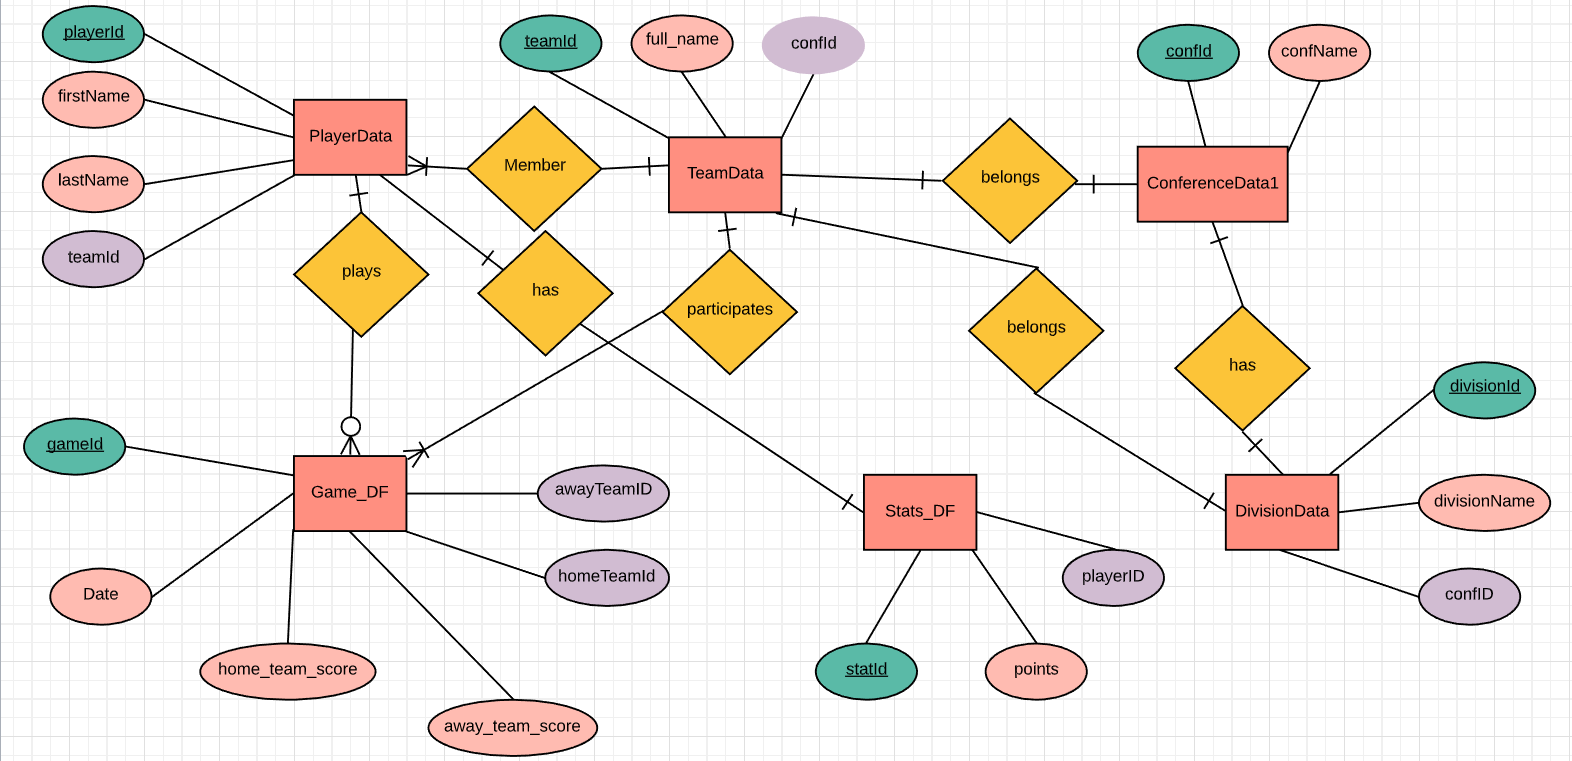

In [320]:
Image("UMLModel.png")

# Question and Answers:

Q1. What are the ranges, data types and format of all of the attributes in your entities?

In [333]:
PlayerData = pd.read_csv("PlayerData.csv")


In [334]:
PlayerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
Unnamed: 0    400 non-null int64
playerId      400 non-null int64
firstName     400 non-null object
lastName      400 non-null object
teamId        400 non-null int64
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [331]:
TeamData =pd.read_csv("TeamData.csv")

In [332]:
TeamData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
Unnamed: 0      29 non-null int64
teamId          29 non-null int64
conference      29 non-null object
division        29 non-null object
full_name       29 non-null object
conferenceId    29 non-null int64
dtypes: int64(3), object(3)
memory usage: 1.5+ KB


In [329]:
Game_DF = pd.read_csv("Game.csv")

In [330]:
Game_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
Unnamed: 0            400 non-null int64
gameId                400 non-null int64
date                  400 non-null object
home_team_score       400 non-null int64
visitor_team_score    400 non-null int64
homeTeamId            400 non-null int64
visitorTeamId         400 non-null int64
dtypes: int64(6), object(1)
memory usage: 22.0+ KB


In [335]:
Stats_DF = pd.read_csv("Stats.csv")

In [336]:
Stats_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Unnamed: 0    400 non-null int64
statId        400 non-null int64
playerId      400 non-null int64
points        348 non-null float64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [340]:
ConferenceData1 = pd.read_csv("ConferenceData.csv")

In [341]:
ConferenceData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
Unnamed: 0         2 non-null int64
conference_name    2 non-null object
confId             2 non-null int64
dtypes: int64(2), object(1)
memory usage: 176.0+ bytes


In [342]:
DivisionData = pd.read_csv("DivisionData.csv")

In [343]:
DivisionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
Unnamed: 0      6 non-null int64
divisionName    6 non-null object
conferenceId    6 non-null int64
divisionId      6 non-null int64
dtypes: int64(3), object(1)
memory usage: 320.0+ bytes


Q2. When should you use an entity versus attribute? (Example: address of a person could be
modeled as either)

Ans : We used division and conference as entities instead of attribute for normalizing the tables)

Q3. When should you use an entity or relationship, and placement of attributes?

Ans : There is no entity or attribute in the tables to use in such a way in our data modeling.

Q4. How did you choose your keys? Which are unique?

Ans : The keys were choose on the basis of unique constraint for example : a playerid cannot be repeated,one value can be provided to only on player

Q5. Did you model hierarchies using the “ISA” design element? Why or why not?

Ans: Ther relationships are defined as Is-a relations for example : Player ISA part of Team.
Division ISA part of conferences
Also other relationship are :
Player HAS-A Stats
Team HAS-A Conference

Q6. Were there design alternatives? What are their tradeoffs: entity vs. attribute, entity vs.
relationship, binary vs. ternary relationships?

Ans : All the Design alternatives were considered during normalization process and the tables are normalized accordingly,for example division and conference attributes were made entities for normalization.


Q7. Where are you going find real-world data populate your model?

Ans : Real world data can be found on various reliable sources like : NBA official website,Open Source NBA datasets,Official and fan page accounts on Social Media.

Q8. Are the Tables in 1NF,2NF,3NF?

Ans: Yes all the tables are in 1NF,2NF and 3NF.

# Audit:


### Audit Validity/Acurracy
In this fast moving digital world, having accurate data is one of the most important aspects of data collection. Incorrect data may result from migration of data from one database to another, presence of incorrect values, or even time-bound data changes.Reviewing is an efficient way to check the correctness of the data.To review we cheked for duplicates, dropped the missing values and also the null values.

### Audit Completeness
Data completeness refers to whether there are any gaps in the data from what was expected to be collected, and what was actually collected.The problem of incomplete data can be resolved by ensuring that the data cannot be submitted, unless all expected data is present. Having a mandatory feild of PlayerID, Game ID and Team ID, etc has made sure there is completeness and has resulted in less time consumption for audting completeness.

### Audit Consistency/Uniformity
The mandatory fields from the data prove to be consistent when they act as a primiary key while combining the tables from API datasource.

### Report:




The Assignment is about Data Modelling and Normalization.
The Files used in the assignment were generated in Assignment1 from an open source API and were saved in the form of CSV.
The CSV files are :
PlayerTeamCombined.csv – file containing data about players and teams they belong to
Stats.csv – file containing data about the points each player has in total
Game.csv- contains the details of the NBA games played in year 2018 and 2019
The Data is then Normalized as per Normalization rules of 1NF,2NF and 3NF
The new CSV data files (tables)generated after splitting the original files are :
PlayerData.csv,TeamData.csv,Game.csv,Stats.csv,DivisionData.csv,ConferenceData.csv
Normalization is done by splitting the files based on one similar column in each files which it has a relationship with. In the terms of database it is called as Primary Key and Foreign Key relationship
The Data observed after Normalization contains error free,Non Null and consistent data which shows that normalization is successful and proper datasets are created which can be used as Tables.
The assignment also contains answer to the questions necessary to be answered for noting the correctness of the normalization and modelling purposes.The 10 questions are answered  as per Question and Answer format.
Conceptual Model is created to give the brief concept of the data being used and Normalized.
Physical model is created to give the idea of how the actual tables,keys and attributes will be present in each table.
UML model is created to give the idea about the actual relationship between the entities involved and how the use cases in future will be answered.

Tables : 
PlayerData (playerId(PK ) and teamId(FK))
TeamData(teamId(PK) and conferenceId(FK))
Game_DF(gameId(PK) and homeTeamID and awayTeamId(FK))
Stats_DF(statId(PK) and playerId(FK))
DivisionData(divisionId(PK) and confide(FK))
ConferenceData(conferenceId(PK))

Future Scope :
The future scope contains the creation of actual database and tables.


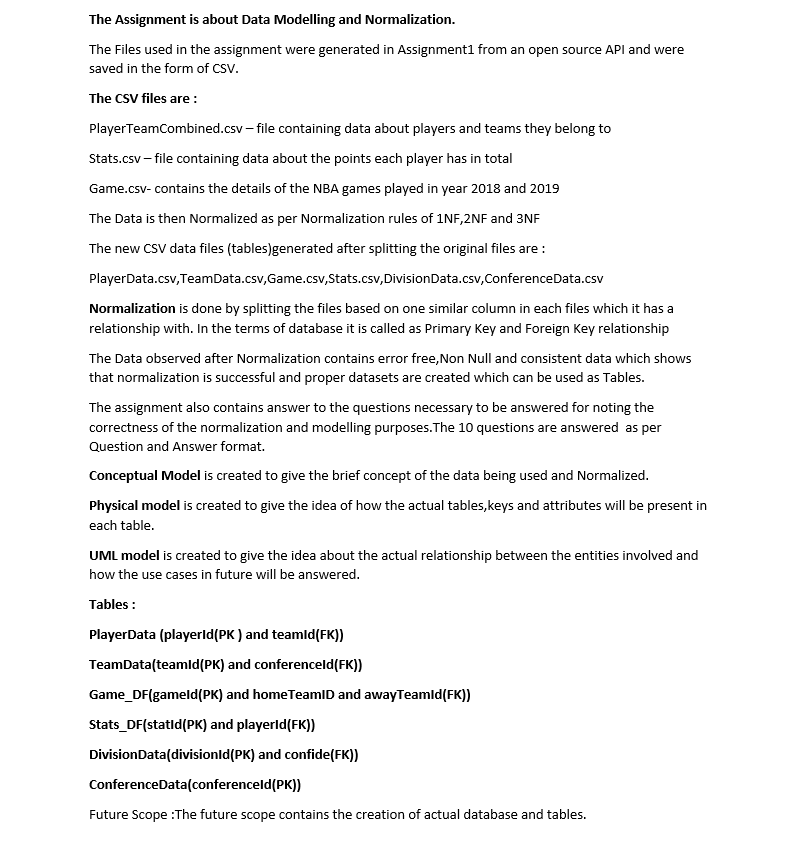

In [345]:
Image("Report.png")

### Contirbution:
I contributed By Own: 30%
Provided by the professor : 30%
By External source: 40%

### Citation:

https://learning.oreilly.com/library/view/web-scraping-with/9781491910283/ch04.html

https://www.youtube.com/watch?v=SPtEh9c5Xf4

https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/ 

https://www.pythonforbeginners.com/beautifulsoup/beautifulsoup-4-python

https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html 

https://www.balldontlie.io/api/v1/

https://www.lucidchart.com/

### LICENSE:

Copyright 2020 Ankita Kamalkishor Tiwari and Vasuki Manoharan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.